In [9]:
import numpy as numpy
import pandas as pandas
import matplotlib as matplot
import matplotlib.pyplot as plot
import zipfile

Data Set Information:

# * The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
# * Acquisition date: January 8, 2015
# * The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.


# Attribute Information:

# Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

# Attribute Information:
# 0. url: URL of the article (non-predictive)
# 1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
# 2. n_tokens_title: Number of words in the title
# 3. n_tokens_content: Number of words in the content
# 4. n_unique_tokens: Rate of unique words in the content
# 5. n_non_stop_words: Rate of non-stop words in the content
# 6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
# 7. num_hrefs: Number of links
# 8. num_self_hrefs: Number of links to other articles published by Mashable
# 9. num_imgs: Number of images
# 10. num_videos: Number of videos
# 11. average_token_length: Average length of the words in the content
# 12. num_keywords: Number of keywords in the metadata
# 13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
# 14. data_channel_is_entertainment: Is data channel 'Entertainment'?
# 15. data_channel_is_bus: Is data channel 'Business'?
# 16. data_channel_is_socmed: Is data channel 'Social Media'?
# 17. data_channel_is_tech: Is data channel 'Tech'?
# 18. data_channel_is_world: Is data channel 'World'?
# 19. kw_min_min: Worst keyword (min. shares)
# 20. kw_max_min: Worst keyword (max. shares)
# 21. kw_avg_min: Worst keyword (avg. shares)
# 22. kw_min_max: Best keyword (min. shares)
# 23. kw_max_max: Best keyword (max. shares)
# 24. kw_avg_max: Best keyword (avg. shares)
# 25. kw_min_avg: Avg. keyword (min. shares)
# 26. kw_max_avg: Avg. keyword (max. shares)
# 27. kw_avg_avg: Avg. keyword (avg. shares)
# 28. self_reference_min_shares: Min. shares of referenced articles in Mashable
# 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
# 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
# 31. weekday_is_monday: Was the article published on a Monday?
# 32. weekday_is_tuesday: Was the article published on a Tuesday?
# 33. weekday_is_wednesday: Was the article published on a Wednesday?
# 34. weekday_is_thursday: Was the article published on a Thursday?
# 35. weekday_is_friday: Was the article published on a Friday?
# 36. weekday_is_saturday: Was the article published on a Saturday?
# 37. weekday_is_sunday: Was the article published on a Sunday?
# 38. is_weekend: Was the article published on the weekend?
# 39. LDA_00: Closeness to LDA topic 0
# 40. LDA_01: Closeness to LDA topic 1
# 41. LDA_02: Closeness to LDA topic 2
# 42. LDA_03: Closeness to LDA topic 3
# 43. LDA_04: Closeness to LDA topic 4
# 44. global_subjectivity: Text subjectivity
# 45. global_sentiment_polarity: Text sentiment polarity
# 46. global_rate_positive_words: Rate of positive words in the content
# 47. global_rate_negative_words: Rate of negative words in the content
# 48. rate_positive_words: Rate of positive words among non-neutral tokens
# 49. rate_negative_words: Rate of negative words among non-neutral tokens
# 50. avg_positive_polarity: Avg. polarity of positive words
# 51. min_positive_polarity: Min. polarity of positive words
# 52. max_positive_polarity: Max. polarity of positive words
# 53. avg_negative_polarity: Avg. polarity of negative words
# 54. min_negative_polarity: Min. polarity of negative words
# 55. max_negative_polarity: Max. polarity of negative words
# 56. title_subjectivity: Title subjectivity
# 57. title_sentiment_polarity: Title polarity
# 58. abs_title_subjectivity: Absolute subjectivity level
# 59. abs_title_sentiment_polarity: Absolute polarity level
# 60. shares: Number of shares (target)



## Load Data

In [95]:
newsPopularityData = pandas.read_csv('~/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv')
newsPopularityData.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## <3b> choose the columns for analyses

In [94]:
list(Population.keys())

['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

In [101]:
no_of_rows = Population.shape[0]
no_of_columns = Population.shape[1]
print("rows: %d\n" % no_of_rows)
print("columns: %d\n" % no_of_columns)

rows: 39644

columns: 61



### Visualization of Data

array([[<AxesSubplot:title={'center':' timedelta'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_content'}>,
        <AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>,
        <AxesSubplot:title={'center':' num_hrefs'}>,
        <AxesSubplot:title={'center':' num_self_hrefs'}>],
       [<AxesSubplot:title={'center':' num_imgs'}>,
        <AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>,
        <AxesSubplot:title={'center':' data_channel_is_lifestyle'}>,
        <AxesSubplot:title={'center':' data_channel_is_entertainment'}>,
        <AxesSubplot:title={'center':' data_channel_is_bus'}>,
        <AxesSubplot:title={'center':' data_channel_is_socmed'}>],
       [<AxesSubplot:title={'cen

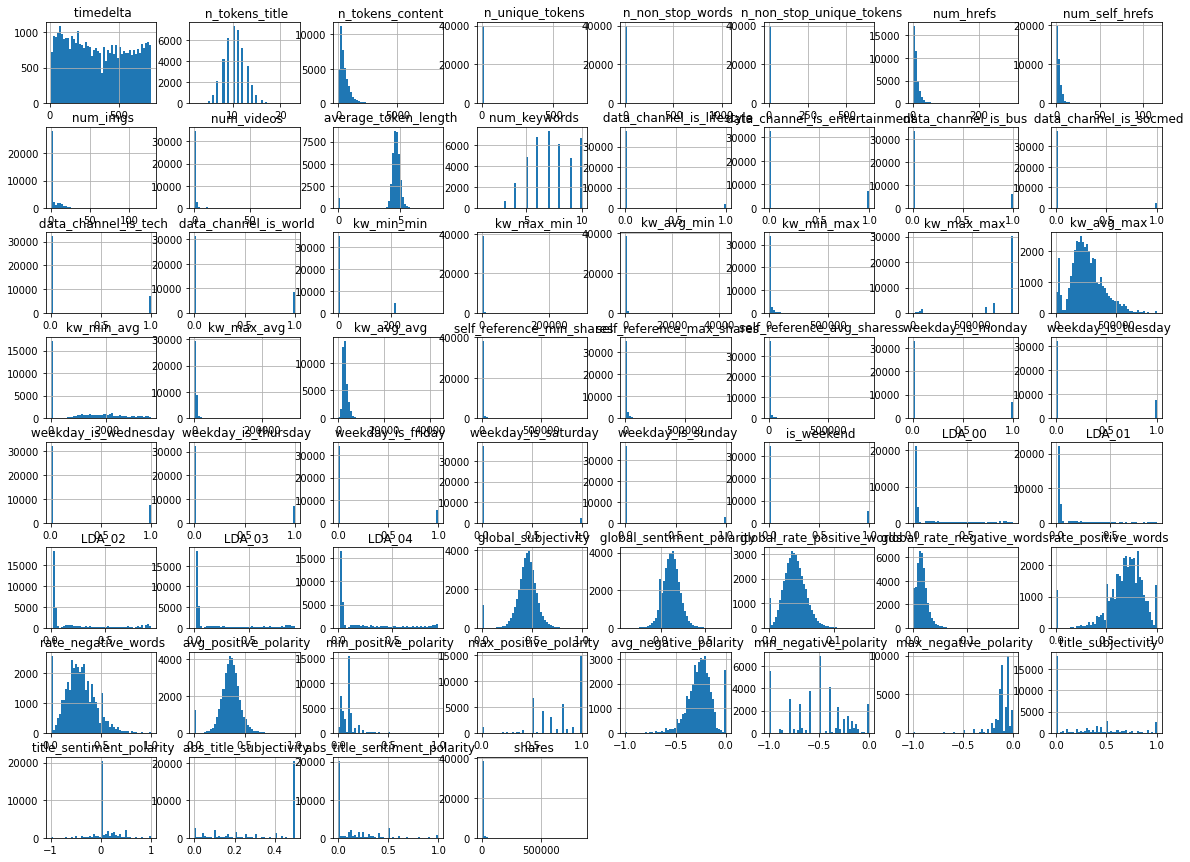

In [103]:
Population.hist(bins = 50, figsize=(20,15))
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

In [ ]:
# single column

<AxesSubplot:>

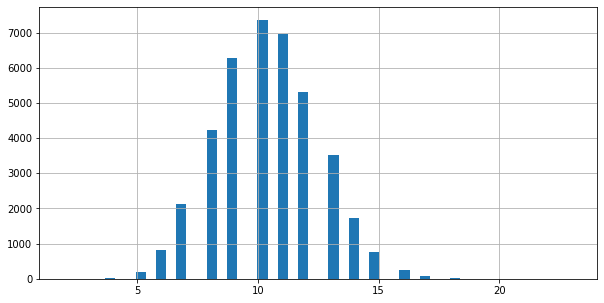

In [115]:
Population[' n_tokens_title'].hist(bins=50,figsize=(10,5))

## 7a. Explore the Data

In [116]:
Population.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Describe Columns with Categorical Attributes

In [117]:
for col in Population.columns:
    if Population[col].dtype == 'object':
        print('Column Name:',col)
        print(Population[col].value_counts())

Column Name: url
http://mashable.com/2014/01/08/antares-rocket-launch-scrubbed-after-massive-solar-flare/    1
http://mashable.com/2014/06/25/photography-low-light/                                       1
http://mashable.com/2014/10/31/british-museum-3d-printing-sketchfab/                        1
http://mashable.com/2013/01/18/nhl-gamecenter/                                              1
http://mashable.com/2013/05/10/athletes-mothers-day-facebook-photos/                        1
                                                                                           ..
http://mashable.com/2013/11/29/scout-dog-tumblr/                                            1
http://mashable.com/2014/05/05/google-shopping-express-manhattan-la/                        1
http://mashable.com/2014/11/01/hp-smartwatch/                                               1
http://mashable.com/2014/08/15/lgbt-friendly-universities/                                  1
http://mashable.com/2014/03/17/jony-ive-int

In [119]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   